<a href="https://colab.research.google.com/github/JPP-J/deep-_learning_project/blob/main/DL_5_WITH_openthaigpt_1_0_0_7b_chat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## GPU Runtime Type
GPU Memory requirement at least 8784MiB.
Please select "T4 GPU" or "V100 GPU".

In [ ]:
!nvidia-smi

Wed Jan  8 07:03:04 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

[Ref. Official OpenThaiGPT's Colab](https://colab.research.google.com/drive/1dKNjLhOl1alBezcPdLihwqEOwJhcNAum)

# Usage openthaigpt/openthaigpt-1.0.0-7b-chat

## Description
Prompt format is Llama2
```
<s>[INST] <<SYS>>
system_prompt
<</SYS>>

question [/INST]
```
System prompt:
You are a question answering assistant. Answer the question as truthful and helpful as possible คุณคือผู้ช่วยตอบคำถาม จงตอบคำถามอย่างถูกต้องและมีประโยชน์ที่สุด

## How to use

1. install llama.cpp (https://github.com/ggerganov/llama.cpp)
2. (run from inside llama.cpp directory) ./server -m /path/to/ggml-model-q4_0.gguf -c 2048 -ngl 43
   (decrease 43 to smaller number if not enough GPU memory)
3. run inference (CURL example)

```
curl --request POST \
    --url http://localhost:8080/completion \
    --header "Content-Type: application/json" \
    --data '{"prompt": "<s>[INST] <<SYS>>\nYou are a question answering assistant. Answer the question as truthful and helpful as possible คุณคือผู้ช่วยตอบคำถาม จงตอบคำถามอย่างถูกต้องและมีประโยชน์ที่สุด\n<</SYS>>\n\nอยากลดความอ้วนต้องทำอย่างไร [/INST]","use_beam_search": false, "temperature": 0.1, "n_predict": 512, "top_p": 0.75, "top_k": 40, "frequency_penalty": 0.3 "stop": "[</s>]"}'
```
<i>Disclaimer: Provided responses are not guaranteed.</i>

In [ ]:
! CMAKE_ARGS="-DLLAMA_CUBLAS=on" pip install llama-cpp-python==0.2.24

In [ ]:
!pip install llama-index==0.9.19

## Model URL
openthaigpt/openthaigpt-1.0.0-7b-chat

In [ ]:
model_url = "https://huggingface.co/openthaigpt/openthaigpt-1.0.0-7b-chat/resolve/main/ggml-model-f16.gguf"

In [ ]:
from llama_index import (
    SimpleDirectoryReader,
    VectorStoreIndex,
    ServiceContext,
)
from llama_index.llms import LlamaCPP
from llama_index.llms.llama_utils import (
    messages_to_prompt,
    completion_to_prompt,
)

In [ ]:
llm = LlamaCPP(
    # You can pass in the URL to a GGML model to download it automatically
    model_url=model_url,
    # optionally, you can set the path to a pre-downloaded model instead of model_url
    model_path=None,
    temperature=0.1,
    max_new_tokens=256,
    # llama2 has a context window of 4096 tokens, but we set it lower to allow for some wiggle room
    context_window=3900,
    # kwargs to pass to __call__()
    generate_kwargs={},
    # kwargs to pass to __init__()
    # set to at least 1 to use GPU
    model_kwargs={"n_gpu_layers": 43},
    # transform inputs into Llama2 format
    messages_to_prompt=messages_to_prompt,
    completion_to_prompt=completion_to_prompt,
    verbose=True,
)

AVX = 1 | AVX2 = 1 | AVX512 = 1 | AVX512_VBMI = 0 | AVX512_VNNI = 0 | FMA = 1 | NEON = 0 | ARM_FMA = 0 | F16C = 1 | FP16_VA = 0 | WASM_SIMD = 0 | BLAS = 1 | SSE3 = 1 | SSSE3 = 1 | VSX = 0 | 


### Example1:

In [ ]:
response = llm.complete("เนื้อเพลง ความเชื่อ bodyslam")
print(response.text)

Llama.generate: prefix-match hit


ความเชื่อของฉัน ฉันยังคงยืนหยัด แม้ว่ามันจะไม่มีวันสมหวัง อย่างน้อยฉันก็พยายามอย่างหนักที่จะทำให้มันเกิดขึ้น หากความเชื่อของเราพังทลายลง ก็ช่วยอะไรไม่ได้ เราจะปล่อยมันไปและเสี่ยงกันเถอะ


### Example2:

In [ ]:
response = llm.complete("แปลภาษาอังกฤษเป็นไทย: No great science should ever put lives in danger")
print(response.text)

Llama.generate: prefix-match hit


ไม่มีอันยิ่งใหญ่ใดที่ควรก่อให้เกิดอันตรายต่อชีวิต


In [ ]:
response = llm.complete("แปลภาษาไทยเป็นอังกฤษ: ไม่ว่าวิทยาศาสตร์ที่ยิ่งใหญ่แค่ไหน ก็ไม่ควรทำให้ชีวิตทั้งหลายเผชิญกับภัยอันตราย")
print(response.text)

Llama.generate: prefix-match hit


The phrase "I love you" translated into Spanish is "Te quiero" or "Te amo".


### Example3:

In [ ]:
response = llm.complete("วางแผนเที่ยวในเชียงใหม่ 2025 ช่วงกลางปี 3-4 วัน")
print(response.text)

Llama.generate: prefix-match hit


ฉันขอแนะนำให้คุณวางแผนเดินทางไปตามถนนสายใหญ่หรือทางหลวงหมายเลข 117 จากลำปางไปเชียงราย และพักค้างคืนที่พะเยาก่อนจะเดินทางต่อในเช้าวันถัดไปไปยังแม่สายและสามเหลี่ยมทองคำ อย่าลืมแวะเที่ยววัดร่องขุ่นระหว่างทาง!


### Example4:

In [ ]:
response = llm.complete("x+30=100 x=?")
print(response.text)

Llama.generate: prefix-match hit


**คำตอบ:**

x = 70

**คำอธิบาย:**

สมการที่กำหนดคือ x + 30 = 100 ซึ่งหมายความว่าค่าของ x จะต้องเท่ากับ 100 - 30 = 70


# GUI Interface

In [ ]:
!pip install gradio requests

In [ ]:
import argparse
import gradio as gr
from llama_index.llms import LlamaCPP
from llama_index.llms.llama_utils import (
    messages_to_prompt,
    completion_to_prompt,
)

# Define the model URL
model_name = "openthaigpt-1.0.0-7b-chat"
model_url = "https://huggingface.co/openthaigpt/openthaigpt-1.0.0-7b-chat/resolve/main/ggml-model-f16.gguf"

# Initialize the LlamaCPP model
llm = LlamaCPP(
    model_url=model_url,  # URL to download the model
    model_path=None,  # Automatically download to a temporary location
    temperature=0.1,
    max_new_tokens=256,
    context_window=3900,
    generate_kwargs={},
    model_kwargs={"n_gpu_layers": 43},  # Adjust based on your GPU
    messages_to_prompt=messages_to_prompt,
    completion_to_prompt=completion_to_prompt,
    verbose=True,
)

def http_bot(instruction,
             input=None,
             temperature=0.3,
             top_p=0.75,
             top_k=40,
             beams=1,
             max_tokens=256,
             frequency_penalty=0.3,
             is_streaming=False):
    try:
        # Construct the prompt
        if input is None:
            prompt = f"""### Instruction:
{instruction}

### Response:

"""
        else:
            prompt = f"""### Instruction:
{instruction}

### Input:
{input}

### Response:

"""

        # Set generation parameters
        llm.temperature = temperature
        llm.max_new_tokens = max_tokens

        # Generate the response
        if is_streaming:
            response_iter = llm.stream_complete(prompt)
            for response in response_iter:
                yield response.delta
        else:
            response = llm.complete(prompt)
            yield response.text

    except Exception as e:
        print("Error during generation:", str(e))  # Debugging
        yield f"An error occurred: {str(e)}"

def clearText():
    return ["", "", ""]

def example1():
    return ["ลดความอ้วนต้องทำอย่างไร", ""]

def example2():
    return ["ตราสารหนี้คืออะไร? และมีประโยชน์กับการลงทุนอย่างไร? ขอคำอธิบายแบบง่ายๆ", ""]

def example3():
    return ["ดอกเบี้ยคืออะไร", ""]

def example4():
    return ["เขียนโค้ด", "python pandas csv export"]

def example5():
    return ["translate the following text to Thai", "Bangkok is the capital and most populous city of Thailand. It is a major commercial, transportation and economic hub, as well as a city of global cultural, artistic and historical significance."]

def example6():
    return ["แปลข้อความเป็นภาษาอังกฤษ", "กรุงเทพมหานคร เป็นเมืองหลวงและนครที่มีประชากรมากที่สุดของประเทศไทย เป็นศูนย์กลางการปกครอง การศึกษา การคมนาคมขนส่ง การเงินการธนาคาร การพาณิชย์ การสื่อสาร และความเจริญของประเทศ"]

if __name__ == "__main__":
    parser = argparse.ArgumentParser()
    parser.add_argument("--host", type=str, default="0.0.0.0")
    parser.add_argument("--port", type=int, default=7861)
    args, _ = parser.parse_known_args()

    with gr.Blocks() as demo:
        gr.Markdown(
            f"""
            # {model_name}
            {model_name}  is a Thai language 7B-parameter LLaMA v2 Chat model finetuned to follow Thai translated instructions and extend 10,000 Thai words vocabularies for turbo speed.

            ## Examples
            """
        )
        with gr.Row():
            example1_button = gr.Button(value="ลดความอ้วนต้องทำอย่างไร")
            example2_button = gr.Button(value="ตราสารหนี้")
            example3_button = gr.Button(value="ดอกเบี้ย")
            example4_button = gr.Button(value="เขียนโค้ด")
            example5_button = gr.Button(value="แปล EN -> TH")
            example6_button = gr.Button(value="แปล TH -> EN")

        instbox = gr.components.Textbox(
                lines=2,
                label="Instruction",
                placeholder="คำสั่ง",
                value="ลดความอ้วนต้องทำอย่างไร"
            )
        inputbox = gr.components.Textbox(lines=2, label="Input", placeholder="คำถาม (ไม่จำเป็น)")
        streambox = gr.components.Checkbox(label="Stream output", value=True)
        button = gr.Button(value="Generate", variant="primary")

        with gr.Row():
            cancel = gr.Button(value="Stop / Cancel")
            clear = gr.Button(value="Clear")

        outputbox = gr.components.Textbox(  # Updated to use gr.components.Textbox
                lines=5,
                label="Output",
            )

        with gr.Accordion("Advanced Settings", open=False):
            tempbox = gr.components.Slider(
                minimum=0, maximum=1, value=0.3, info="อุณหภูมิ: พารามิเตอร์นี้ใช้ควบคุมความเสี่ยงในการสร้างข้อความของระบบ ถ้าตั้งค่าไว้สูง การสร้างข้อความจะเป็นลักษณะที่หลากหลายมากขึ้น ถ้าตั้งค่าไว้ต่ำ การสร้างข้อความจะมีลักษณะที่มีโครงสร้างแน่นอนมากขึ้น", label="Temperature"
            )
            toppbox = gr.components.Slider(
                minimum=0, maximum=1, value=0.75, info="top-p sampling: พารามิเตอร์นี้ใช้เป็นวิธีการสุ่มตัวเลือกจากคำที่อาจจะถูกเลือกถัดไป ระบบจะสุ่มเลือกจากกลุ่มคำที่มีความน่าจะเป็นรวมกันสูงสุดถึง p%", label="Top p"
            )
            topkbox = gr.components.Slider(
                minimum=0, maximum=100, step=1, value=40, info="top-k sampling: พารามิเตอร์นี้ใช้เลือก k คำที่มีความน่าจะเป็นสูงสุดสำหรับคำถัดไป แล้วจึงสุ่มเลือกหนึ่งใน k คำนั้น", label="Top k"
            )
            beambox = gr.components.Slider(
                minimum=1, maximum=4, step=1, value=4, info="beam: จำนวนวิธีการสร้างข้อความโดยใช้คำหลายๆ ทางเลือกที่น่าจะเป็นที่สุดในแต่ละขั้นตอน การตั้งค่า Beam ที่สูงขึ้นจะทำให้สามารถสำรวจคำหลายทางเลือกมากขึ้น แต่จะเพิ่มการคำนวณและอาจจะไม่ทำให้ผลลัพธ์ดีขึ้นทุกครั้ง", label="Beams"
            )
            maxtokenbox = gr.components.Slider(
                minimum=1, maximum=4096, step=1, value=512, info="max_token: ความยาวของคำตอบ", label="Max tokens"
            )
            freq_penalty_box = gr.components.Slider(
                minimum=0.1, maximum=10, step=0.1, value=0.4, info="frequency_penalty: ความรุนแรงในการลงโทษเมื่อตอบข้อความซ้ำ 0.1=ไม่ลงโทษ 10=ลงโทษสูงสุด", label="Repetition Penalty"
            )

        button_click_event = button.click(fn=http_bot, inputs=[instbox, inputbox, tempbox, toppbox, topkbox, beambox, maxtokenbox, freq_penalty_box, streambox], outputs=outputbox)
        cancel.click(fn=None, inputs=None, outputs=None, cancels=[button_click_event])
        clear.click(fn=clearText, outputs=[instbox, inputbox, outputbox])

        example1_button.click(fn=example1, outputs=[instbox, inputbox])
        example2_button.click(fn=example2, outputs=[instbox, inputbox])
        example3_button.click(fn=example3, outputs=[instbox, inputbox])
        example4_button.click(fn=example4, outputs=[instbox, inputbox])
        example5_button.click(fn=example5, outputs=[instbox, inputbox])
        example6_button.click(fn=example6, outputs=[instbox, inputbox])
        demo.queue(max_size=100).launch(server_name=args.host,
                                              server_port=7870,  # Change to a different port
                                              share=True)

AVX = 1 | AVX2 = 1 | AVX512 = 1 | AVX512_VBMI = 0 | AVX512_VNNI = 0 | FMA = 1 | NEON = 0 | ARM_FMA = 0 | F16C = 1 | FP16_VA = 0 | WASM_SIMD = 0 | BLAS = 1 | SSE3 = 1 | SSSE3 = 1 | VSX = 0 | 


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
IMPORTANT: You are using gradio version 3.44.4, however version 4.44.1 is available, please upgrade.
--------
Running on public URL: https://6543da3b4aae12a188.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


### Example:

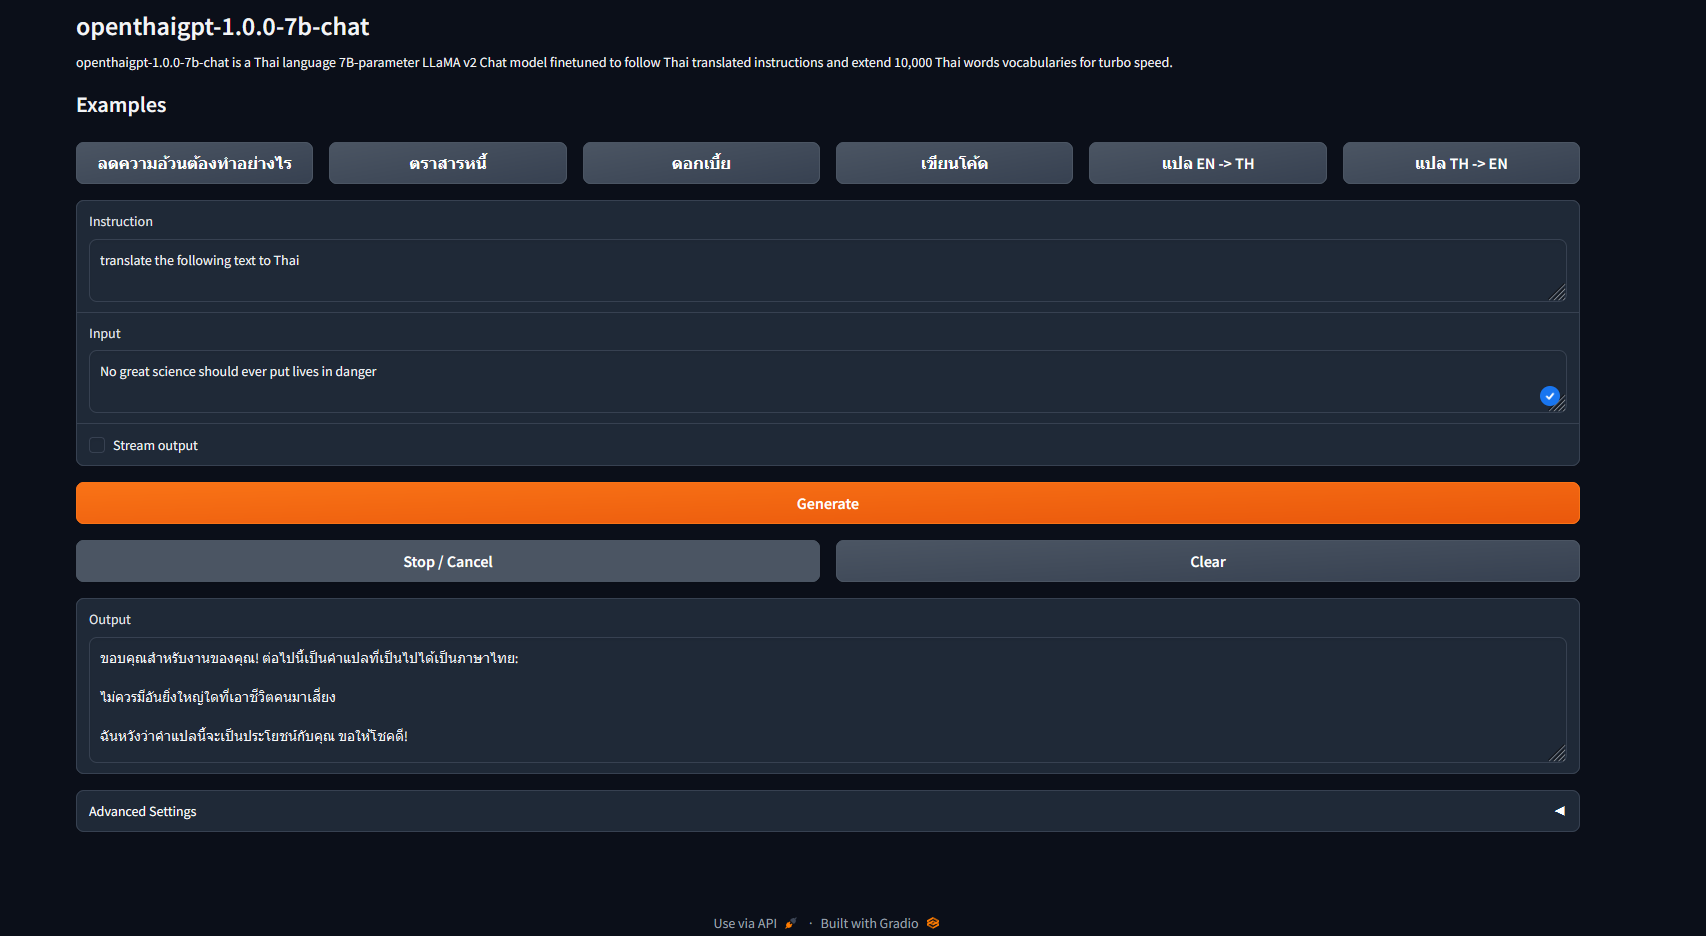